Import Dependencies

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import cv2
import numpy as np
import os 
from matplotlib import pyplot as plt
import time 
import mediapipe as mp

2024-08-01 14:54:18.283843: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 14:54:18.283887: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 14:54:18.285317: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-01 14:54:18.293205: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-01 14:54:19.059731: W tensorflow/compiler/tf2

media pipe holistics

In [3]:
mp_holistic = mp.solutions.holistic  # media pipe holistic model 
mp_drawing = mp.solutions.drawing_utils # media pipe drawing utilities

In [4]:
def mediapipe_detection(image, model):
    # Convert the image from RGB to BGR for OpenCV processing
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Improve performance by making the image array non-writeable
    image.flags.writeable = False

    # Process the image with the MediaPipe model
    results = model.process(image)

    # Make the image array writeable again
    image.flags.writeable = True

    # Convert the image back to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Return the processed image and the results
    return image, results


In [5]:
# Define custom drawing styles
face_landmark_style = mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1)
face_connection_style = mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)

pose_landmark_style = mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4)
pose_connection_style = mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)

left_hand_landmark_style = mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4)
left_hand_connection_style = mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)

right_hand_landmark_style = mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4)
right_hand_connection_style = mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,landmark_drawing_spec=face_landmark_style,connection_drawing_spec=face_connection_style) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,landmark_drawing_spec=pose_landmark_style,connection_drawing_spec=pose_connection_style) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,landmark_drawing_spec=left_hand_landmark_style,connection_drawing_spec=left_hand_connection_style) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,landmark_drawing_spec=right_hand_landmark_style,connection_drawing_spec=right_hand_connection_style) # Draw right hand connections


In [12]:
import cv2

# Open the default camera (usually the webcam)
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open video stream or file")
    exit()

with mp_holistic.Holistic(min_detection_confidence= 0.5 , min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()  # Read a frame from the camera


        if not ret: 
            print("Error: Failed to capture image")
            break
        

        image , results = mediapipe_detection(frame, holistic)
        print(results)

        draw_landmarks(image,results)
        
        cv2.imshow('CV2 Feed', image)  # Display the frame in a window named 'CV2 Feed'
        
        # Check if 'q' key is pressed to break the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()  # Release the camera
    cv2.destroyAllWindows()  # Close all OpenCV windows



libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [13]:
results

mediapipe.python.solution_base.SolutionOutputs

In [14]:
len(results.face_landmarks.landmark)

468

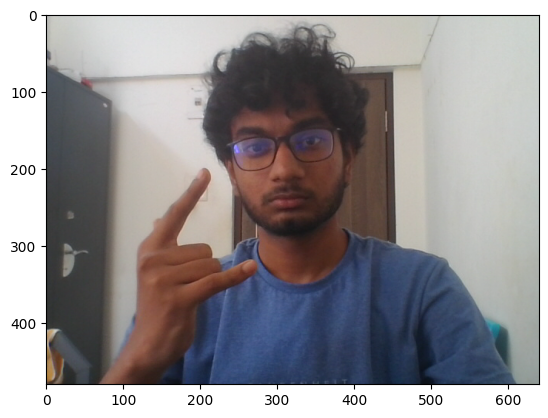

In [15]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [16]:
draw_landmarks(frame, results)

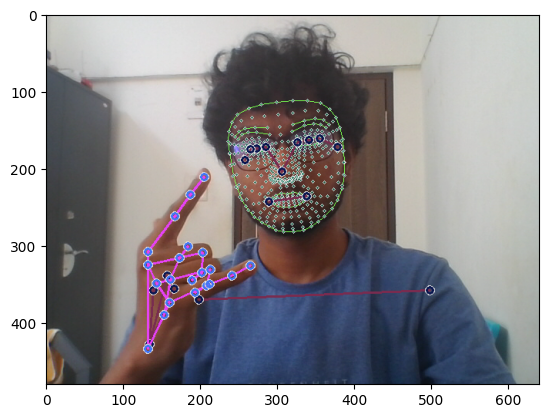

In [17]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

Extract the key point values

In [18]:
results

mediapipe.python.solution_base.SolutionOutputs

In [19]:
results.face_landmarks

landmark {
  x: 0.489423364
  y: 0.485823691
  z: -0.0268564317
}
landmark {
  x: 0.485297829
  y: 0.445553243
  z: -0.051709231
}
landmark {
  x: 0.487499207
  y: 0.457639426
  z: -0.0263050813
}
landmark {
  x: 0.473290861
  y: 0.398795247
  z: -0.0388775878
}
landmark {
  x: 0.483800024
  y: 0.431180298
  z: -0.0552746356
}
landmark {
  x: 0.48236993
  y: 0.411710978
  z: -0.0517304055
}
landmark {
  x: 0.479529619
  y: 0.364101321
  z: -0.0261817668
}
landmark {
  x: 0.410392046
  y: 0.369354129
  z: 0.015960684
}
landmark {
  x: 0.476365179
  y: 0.325906038
  z: -0.0205524676
}
landmark {
  x: 0.474508971
  y: 0.306085557
  z: -0.0232590064
}
landmark {
  x: 0.468411058
  y: 0.238278687
  z: -0.0151679665
}
landmark {
  x: 0.489972413
  y: 0.492270708
  z: -0.0254167933
}
landmark {
  x: 0.490634531
  y: 0.496996522
  z: -0.0219226219
}
landmark {
  x: 0.491249442
  y: 0.498816729
  z: -0.0174297486
}
landmark {
  x: 0.491579145
  y: 0.502079129
  z: -0.0160673
}
landmark {
  x: 0

In [20]:
results.face_landmarks.landmark

[x: 0.489423364
y: 0.485823691
z: -0.0268564317
, x: 0.485297829
y: 0.445553243
z: -0.051709231
, x: 0.487499207
y: 0.457639426
z: -0.0263050813
, x: 0.473290861
y: 0.398795247
z: -0.0388775878
, x: 0.483800024
y: 0.431180298
z: -0.0552746356
, x: 0.48236993
y: 0.411710978
z: -0.0517304055
, x: 0.479529619
y: 0.364101321
z: -0.0261817668
, x: 0.410392046
y: 0.369354129
z: 0.015960684
, x: 0.476365179
y: 0.325906038
z: -0.0205524676
, x: 0.474508971
y: 0.306085557
z: -0.0232590064
, x: 0.468411058
y: 0.238278687
z: -0.0151679665
, x: 0.489972413
y: 0.492270708
z: -0.0254167933
, x: 0.490634531
y: 0.496996522
z: -0.0219226219
, x: 0.491249442
y: 0.498816729
z: -0.0174297486
, x: 0.491579145
y: 0.502079129
z: -0.0160673
, x: 0.491948575
y: 0.507642448
z: -0.0174655709
, x: 0.492566913
y: 0.514739335
z: -0.0192952435
, x: 0.493489832
y: 0.52207464
z: -0.0175529327
, x: 0.495498419
y: 0.534628153
z: -0.00771550089
, x: 0.486307383
y: 0.452499568
z: -0.0464735553
, x: 0.477706581
y: 0.452060

In [21]:
len(results.face_landmarks.landmark)

468

In [22]:
len(results.pose_landmarks.landmark)

33

In [23]:
# error comes when there is no left hand in the picture captured
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [24]:
len(results.right_hand_landmarks.landmark)

21

In [25]:
face = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x, res.y, res.z])
    face.append(test)

In [26]:
# 468*3 = 1404 it has 3 directions x y z
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [27]:
face[:10]

array([ 0.48942336,  0.48582369, -0.02685643,  0.48529783,  0.44555324,
       -0.05170923,  0.48749921,  0.45763943, -0.02630508,  0.47329086])

In [28]:
# here we have 4 vars, x y z visibility so 33*4 = 132
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)


In [29]:
pose[:10]

array([ 0.4789857 ,  0.42556843, -1.2518599 ,  0.99994373,  0.51078403,
        0.34593591, -1.19436169,  0.99986047,  0.53322566,  0.34083775])

In [30]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)


In [31]:
lh[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [33]:
rh[:10]

array([ 2.07041383e-01,  9.05160189e-01,  1.85369913e-07,  2.39993006e-01,
        8.14521432e-01,  9.82888229e-03,  2.52297699e-01,  7.16834188e-01,
       -2.61965347e-03,  2.71026790e-01])

In [34]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [35]:
result_test = extract_keypoints(results)


In [36]:
result_test

array([ 0.4789857 ,  0.42556843, -1.2518599 , ...,  0.41479421,
        0.68044734, -0.097237  ])

Folder 

In [41]:
# folder path for the exported data , numpy array
DATA_PATH = os.path.join('MP_Data')

# Actions which we will try to detect
actions = np.array(['hello','thanks','iloveyou'])

# 30 videos for each action
no_sequences = 30

# 30 frames for each video
sequence_length = 30

In [42]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass


Collecting keypoint for training and testing

In [43]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: 

In [40]:
cap.release()
cv2.destroyAllWindows()